# DCA0133 - Aprendizagem de Máquina e Mineração de Dados
### Trabalho 2 - Unidade 1 - Predição de Preços de Casas
* Aluno: Fernando Lucas
* Matrícula: 20220080534


---




*   Esse trabalho tem como referência: https://www.kaggle.com/code/abdelrahmanramadan2/housing-price-prediction-using-linear-regression



### Importação das Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Leitura e Quantidade de dados do dataset utilizado:

In [ ]:
data = pd.read_csv('./Housing.csv', encoding='latin-1')
data.shape

(545, 13)

### Breve demonstração dos dados:

In [ ]:
data.head(n=10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### Pré-processamento: Adaptação dos dados


*   Transformar os dados que não são númericos;



In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data[['mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = data[['mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].applymap(lambda x: {"yes": 1, "no": 0}.get(x, x))
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
dataMob = pd.get_dummies(data[data.columns[-1]])
dataMob.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
data.drop(['furnishingstatus'], axis=1, inplace=True)
data = pd.concat([data, dataMob], axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


### Divisão do conjunto de dados

* Dados de treinamento: 80%
* Dados de teste: 20%

In [ ]:
# Dividir os dados em conjunto de treinamento e teste
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=100)

In [ ]:
print("Dados de treinamento: ", X_train.shape, "\n", "Dados de teste: ", X_test.shape)

Dados de treinamento:  (436, 15) 
 Dados de teste:  (109, 15)


In [ ]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,1,0,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,1,0,0
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,1,0,0
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,1,0,0
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,0,1,0


In [ ]:
X_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,0,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,0,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,0,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,0,1,0


### Pré-processamento: MinMaxScaler


*   Útil para manter os dados em um intervalo de 0 a 1
*   Dados de treinamento
*   Dados de teste





In [ ]:
scaler = MinMaxScaler()

X_train[data.columns] = scaler.fit_transform(X_train[data.columns])
y_train = X_train.pop('price')
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0,0.0,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0


In [ ]:
X_test[data.columns] = scaler.fit_transform(X_test[data.columns])
y_test = X_test.pop('price')

### Regressão Linear

* Utilização do modelo de regressão múltiplo (ensemble) para melhor desempenho
* Construção de várias árvores de decisão
* Cada nó das árvores seleciona aleatoriamente o subconjunto de atributos a serem utilizados para treinamento
* n_estimators: número de árvores do modelo
* random_state: consistência


In [ ]:
reg = RandomForestRegressor(n_estimators=10, random_state=100)
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [ ]:
scoreTrain = reg.score(X_train, y_train)
prediction = reg.predict(X_test)

print("Score de Treinamento: ", scoreTrain)

Score de Treinamento:  0.9249659755605595


In [ ]:
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00984128987119037


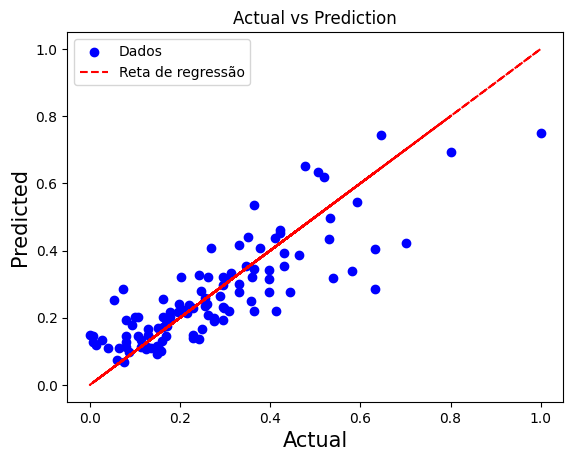

In [ ]:
y_test.shape

y_test_matrix = y_test.values.reshape(-1, 1)
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})
# Plotar os pontos de dados
plt.scatter(data_frame['actual'], data_frame['predicted'], color='blue', label='Dados')

# Adicionar a reta de regressão
plt.plot(data_frame['actual'], data_frame['actual'], color='red', linestyle='--', label='Reta de regressão')

# Adicionar rótulos e legenda
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.legend()

# Exibir o gráfico
plt.show()